In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=500, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred=dt_clf.predict(X_test)

In [2]:
bag_clf.score(X_train,y_train), bag_clf.score(X_test,y_test) # 성능평가 : (train정확도, test정확도)

(0.9546666666666667, 0.928)

In [3]:
dt_clf.score(X_train,y_train), dt_clf.score(X_test,y_test)

(1.0, 0.888)

In [4]:
y_pred==dt_y_pred

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,
                          bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9333333333333333

In [6]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.928

In [7]:
bag_clf.score(X_test,y_test) 

0.928

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [9]:
Xm, ym=make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

C:\Users\Affinity\Anaconda3\envs\mypython\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Affinity\Anaconda3\envs\mypython\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


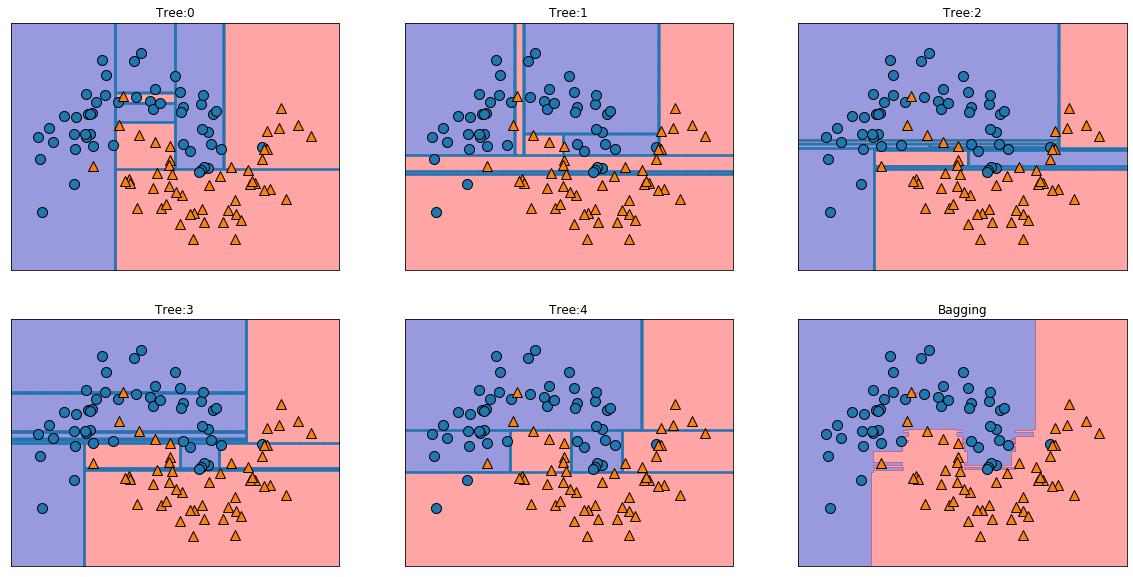

In [15]:
import matplotlib.pyplot as plt
import mglearn

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title("Tree:{}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42, max_features=1)
RF.fit(Xm_train, ym_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

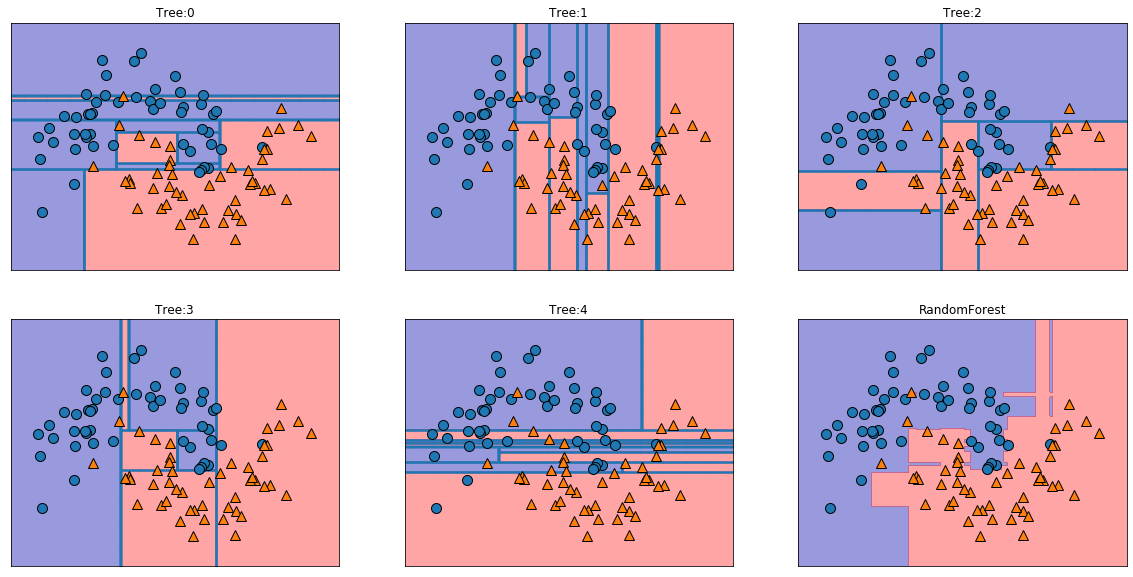

In [17]:
import matplotlib.pyplot as plt
import mglearn

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),RF.estimators_)):
    ax.set_title("Tree:{}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(RF, Xm, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("RandomForest")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [18]:
X.shape

(500, 2)

In [19]:
X

array([[-4.03039439e-01,  1.07769490e+00],
       [ 9.56401908e-02,  2.00580798e-01],
       [ 5.83048166e-01,  5.74628700e-01],
       [-1.28586848e+00, -1.99985906e-01],
       [-8.16065538e-01,  6.52314513e-01],
       [ 1.29285289e+00, -2.18132256e-01],
       [ 8.01088286e-01,  5.45782121e-02],
       [ 6.72737108e-01,  5.90723657e-01],
       [-6.36788612e-01,  2.57436194e-01],
       [ 1.71520117e+00,  2.26019828e-01],
       [-6.28604910e-01,  9.98864125e-01],
       [-2.93358158e-01,  9.21588505e-01],
       [-5.66151412e-01, -2.50036726e-02],
       [ 5.75535557e-01, -3.23172961e-01],
       [ 1.54505618e+00,  1.39638801e-01],
       [-6.91604418e-01,  5.99253473e-01],
       [ 1.24317022e+00, -2.33636703e-01],
       [ 9.20383963e-02,  9.33530056e-01],
       [ 9.86124826e-01,  8.19721905e-01],
       [ 2.10636145e+00,  1.26332167e-01],
       [-5.32053881e-01,  1.32138670e+00],
       [ 2.46056634e-01,  9.68571758e-01],
       [ 2.32875282e+00,  1.93473134e-01],
       [ 6.

In [20]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name, importance in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,"=",importance)

sepal length (cm) = 0.11249225099876375
sepal width (cm) = 0.02311928828251033
petal length (cm) = 0.4410304643639577
petal width (cm) = 0.4233579963547682


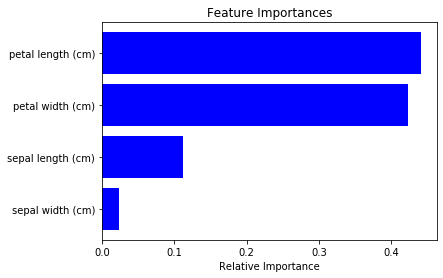

In [21]:
import numpy as np

features=iris['feature_names']
importances=rnd_clf.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [22]:
from numpy import *
import matplotlib.pyplot as plt

In [23]:
def loadSimpData():
    datMat=matrix([[1., 2.1],
                 [2.0, 1.1],
                 [1.3, 1.],
                 [1., 1.],
                 [2., 1.]])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return datMat, classLabels

In [24]:
datMat, classLabels= loadSimpData()

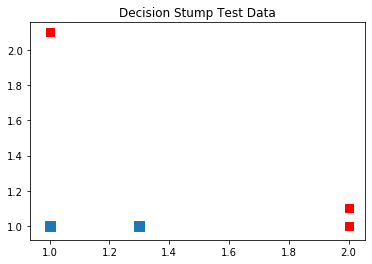

In [25]:
xcord0=[]
ycord0=[]
xcord1=[]
ycord1=[]
markers=[]
colors=[]

for i in range(len(classLabels)):
    if classLabels[i]==1.0:
        xcord1.append(datMat[i,0]),ycord1.append(datMat[i,1])
    else:
        xcord0.append(datMat[i,0]),ycord0.append(datMat[i,1])

fig = plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xcord0, ycord0, marker='s', s=90)
ax.scatter(xcord1, ycord1, marker='s', s=50, c='red')
plt.title('Decision Stump Test Data')
plt.show()

In [26]:
classLabels

[1.0, 1.0, -1.0, -1.0, 1.0]

In [27]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):#just classify the data
    retArray=ones((shape(dataMatrix)[0],1))
    if threshIneq=='lt':
        retArray[dataMatrix[:, dimen]<=threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen]>threshVal] = -1.0
    return retArray

In [28]:
def buildStump(dataArr,classLabels,D):
    dataMatrix=mat(dataArr)
    labelMat=mat(classLabels).T
    m,n=shape(dataMatrix)
    numSteps=10.0
    bestStump={}
    bestClasEst=mat(zeros((m,1)))
    minError=inf #init error sum, to +infinity
    for i in range(n): #loop over all dimensions
        rangeMin=dataMatrix[:,i].min()
        rangeMax=dataMatrix[:,i].max()
        stepSize=(rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1): #loop over all range in current dimension
            for inequal in ['lt','gt']: #go over less than and greater than
                threshVal=(rangeMin+float(j)*stepSize)
                predictedVals=stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr=mat(ones((m,1)))
                errArr[predictedVals==labelMat]=0
                weightedError=D.T*errArr #calc total error multiplied by D
                print("split:dim{}, thresh {}, \
                      thresh ineqal:{}, the wieghed error is {}".format(i,threshVal,inequal,weightedError))
                if weightedError<minError:
                    minError=weightedError
                    bestClasEst=predictedVals.copy()
                    bestStump['dim']=i
                    bestStump['thresh']=threshVal
                    bestStump['ineq']=inequal
    return bestStump,minError,bestClasEst

In [29]:
D=mat(ones((5,1))/5)
buildStump(datMat,classLabels,D)

split:dim0, thresh 0.9,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 0.9,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.0,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.0,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.1,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.1,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.2,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.2,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.3,                       thresh ineqal:lt, the wieghed error is [[0.2]]
split:dim0, thresh 1.3,                       thresh ineqal:gt, the wieghed error is [[0.8]]
split:dim0, thresh 1.4,                       thresh ineqal:lt, the wi

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [30]:
def adaBoostTrainDS(dataArr,classLabels,numlt=40):
    weakClassArr=[]
    m=shape(dataArr)[0]
    D=mat(ones((m,1))/m) # initial D to all equal
    aggClassEst=mat(zeros((m,1)))
    for i in range(numlt):
        bestStump,error,classEst=buildStump(dataArr,classLabels,D) #build stamp
        print("D: {}".format(D.T))
        # calc alpha, throw in max(error,eps) to account for error=0
        alpha=float(0.5*log((1.0-error)/max(error,1e-16)))
        bestStump['alpha']=alpha
        weakClassArr.append(bestStump) #store Stump Params in Array
        print("classEst: {}".format(classEst.T))
        # exponent for D calc, getting messy
        expon=multiply(-1*alpha*mat(classLabels).T,classEst)
        D=multiply(D,exp(expon)) #calc New D for new iteration
        D=D/D.sum()
        # calc training error of all classifiers, 
        # if this is 0 quit for loop early(use break)
        aggClassEst+=alpha*classEst
        print("aggClassEst:{}".format(aggClassEst.T))
        aggErrors=multiply(sign(aggClassEst)!=mat(classLabels).T, ones((m,1)))
        errorRate=aggErrors.sum()/m
        print("total error:{}".format(errorRate))
        if errorRate==0.0: break
    return weakClassArr

In [31]:
adaBoostTrainDS(datMat,classLabels,9)

split:dim0, thresh 0.9,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 0.9,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.0,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.0,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.1,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.1,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.2,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.2,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.3,                       thresh ineqal:lt, the wieghed error is [[0.2]]
split:dim0, thresh 1.3,                       thresh ineqal:gt, the wieghed error is [[0.8]]
split:dim0, thresh 1.4,                       thresh ineqal:lt, the wi

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [42]:
def adaClassify(datToClass,classifierArr):
    #do stuff similar to last aggClassEst in adaBoostTrainDS
    dataMatrix=mat(datToClass)
    m=shape(dataMatrix)[0]
    aggClassEst=mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst=stumpClassify(dataMatrix,classifierArr[i]['dim'],\
                              classifierArr[i]['thresh'],\
                              classifierArr[i]['ineq'])#call stamp classify
        aggClassEst+=classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)
    

In [43]:
classifierArr=adaBoostTrainDS(datMat,classLabels,30)

D: [[0.2 0.2 0.2 0.2 0.2]]
classEst: [[-1.  1. -1. -1.  1.]]
aggClassEst:[[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:0.2
D: [[0.5   0.125 0.125 0.125 0.125]]
classEst: [[ 1.  1. -1. -1. -1.]]
aggClassEst:[[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error:0.2
D: [[0.28571429 0.07142857 0.07142857 0.07142857 0.5       ]]
classEst: [[1. 1. 1. 1. 1.]]
aggClassEst:[[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error:0.0


In [44]:
adaClassify([0,0],classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
Xm, ym=make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)

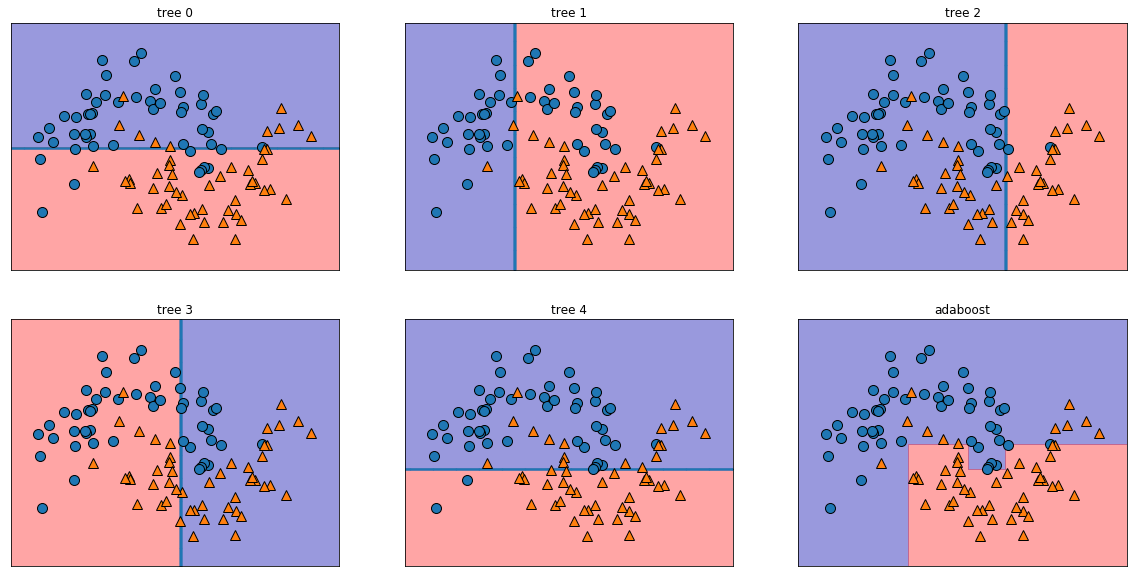

In [56]:
import mglearn
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("adaboost")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

In [47]:
AdaBoostClassifier(n_estimators=5, random_state=42)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=5, random_state=42)

In [60]:
a=list(range(-1,10+1))
a

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [61]:
5/10

0.5

In [62]:
3/10.0

0.3

In [8]:
weakClassArr=[]

In [10]:
dataArr=datMat

In [12]:
m=shape(dataArr)[0]
m

5

In [13]:
D=mat(ones((m,1))/m)
D

matrix([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2]])

In [14]:
aggClassEst=mat(zeros((m,1)))
aggClassEst

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [15]:
bestStump,error,classEst=buildStump(dataArr,classLabels,D)

split:dim0, thresh 0.9,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 0.9,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.0,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.0,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.1,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.1,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.2,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.2,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.3,                       thresh ineqal:lt, the wieghed error is [[0.2]]
split:dim0, thresh 1.3,                       thresh ineqal:gt, the wieghed error is [[0.8]]
split:dim0, thresh 1.4,                       thresh ineqal:lt, the wi

In [22]:
bestStump

{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453}

In [24]:
classEst

array([[-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.]])

In [23]:
error

matrix([[0.2]])

In [16]:
print("D: {}".format(D.T))

D: [[0.2 0.2 0.2 0.2 0.2]]


In [17]:
alpha=float(0.5*log((1.0-error)/max(error,1e-16))) 
alpha

0.6931471805599453

In [18]:
bestStump['alpha']=alpha

In [19]:
bestStump

{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453}

In [25]:
weakClassArr.append(bestStump)

In [26]:
weakClassArr

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453}]

In [27]:
print("classEst: {}".format(classEst.T))

classEst: [[-1.  1. -1. -1.  1.]]


In [28]:
expon=multiply(-1*alpha*mat(classLabels).T,classEst)

In [29]:
expon

matrix([[ 0.69314718],
        [-0.69314718],
        [-0.69314718],
        [-0.69314718],
        [-0.69314718]])

In [31]:
classEst.shape

(5, 1)

In [33]:
mat(classLabels).T.shape

(5, 1)

In [34]:
D=multiply(D,exp(expon)) 

In [36]:
D

matrix([[0.4],
        [0.1],
        [0.1],
        [0.1],
        [0.1]])

In [37]:
D=D/D.sum()

In [38]:
D

matrix([[0.5  ],
        [0.125],
        [0.125],
        [0.125],
        [0.125]])

In [39]:
aggClassEst+=alpha*classEst

In [40]:
aggClassEst

matrix([[-0.69314718],
        [ 0.69314718],
        [-0.69314718],
        [-0.69314718],
        [ 0.69314718]])

In [43]:
sign(aggClassEst)!=mat(classLabels).T

matrix([[ True],
        [False],
        [False],
        [False],
        [False]])

In [44]:
aggErrors=multiply(sign(aggClassEst)!=mat(classLabels).T, ones((m,1)))

In [45]:
aggErrors

matrix([[1.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [46]:
alpha

0.6931471805599453

In [47]:
def adaBoostTrainDS(dataArr,classLabels,numlt=40):
    weakClassArr=[]
    m=shape(dataArr)[0]
    D=mat(ones((m,1))/m) # initial D to all equal
    aggClassEst=mat(zeros((m,1)))
    for i in range(numlt):
        bestStump,error,classEst=buildStump(dataArr,classLabels,D) #build stamp
        print("D: {}".format(D.T))
        # calc alpha, throw in max(error,eps) to account for error=0
        alpha=float(0.5*log((1.0-error)/max(error,1e-16))) # 분모를 0으로 안만들기 위해서
        bestStump['alpha']=alpha
        weakClassArr.append(bestStump) #store Stump Params in Array
        print("classEst: {}".format(classEst.T))
        # exponent for D calc, getting messy
        expon=multiply(-1*alpha*mat(classLabels).T,classEst) 
        D=multiply(D,exp(expon)) #calc New D for new iteration
        D=D/D.sum()
        # calc training error of all classifiers, 
        # if this is 0 quit for loop early(use break)
        aggClassEst+=alpha*classEst
        print("aggClassEst:{}".format(aggClassEst.T))
        aggErrors=multiply(sign(aggClassEst)!=mat(classLabels).T, ones((m,1)))
        errorRate=aggErrors.sum()/m
        print("total error:{}".format(errorRate))
        if errorRate==0.0: break
    return weakClassArr

In [48]:
adaBoostTrainDS(datMat,classLabels,9)

split:dim0, thresh 0.9,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 0.9,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.0,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.0,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.1,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.1,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.2,                       thresh ineqal:lt, the wieghed error is [[0.4]]
split:dim0, thresh 1.2,                       thresh ineqal:gt, the wieghed error is [[0.6]]
split:dim0, thresh 1.3,                       thresh ineqal:lt, the wieghed error is [[0.2]]
split:dim0, thresh 1.3,                       thresh ineqal:gt, the wieghed error is [[0.8]]
split:dim0, thresh 1.4,                       thresh ineqal:lt, the wi

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]